# Section 6.6.
## Ex. 6.29

On the blackboard

## Ex. 6.30

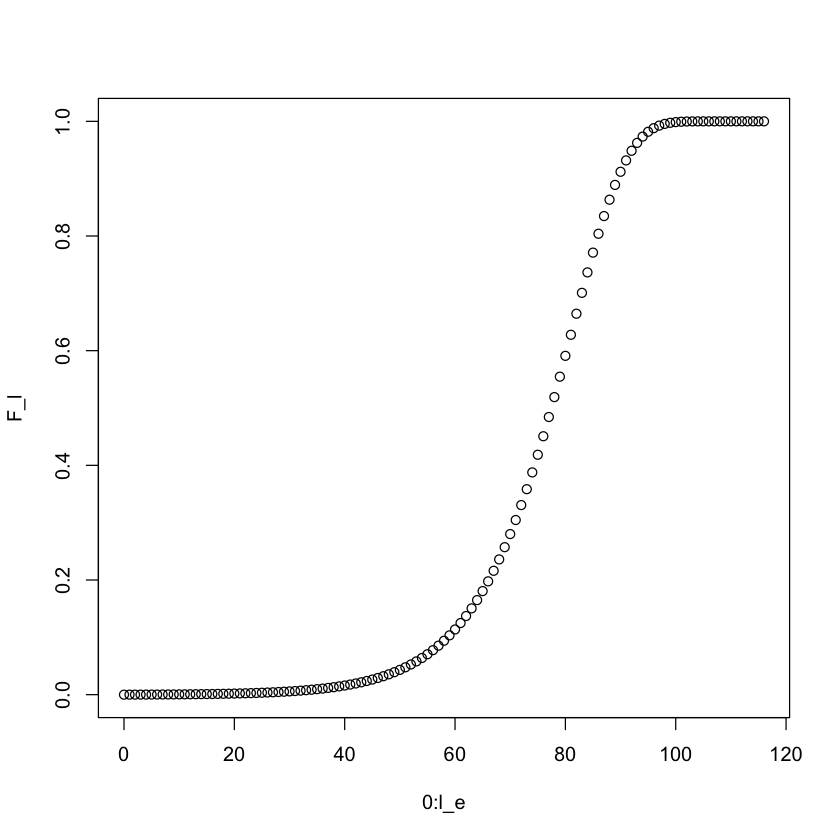

In [194]:
# Inputs

l_e=116
alpha=0.0003
beta=0.1


#calculate F_l probability of survival of l or less years/dying before l

calculate_F_l<-function(l,alpha,beta){
    F_l<-1-exp(-alpha*(exp(beta*l)-1))
    return(F_l)
}

#run function
F_l<-calculate_F_l(0:l_e, alpha,beta)

plot(0:l_e, F_l)

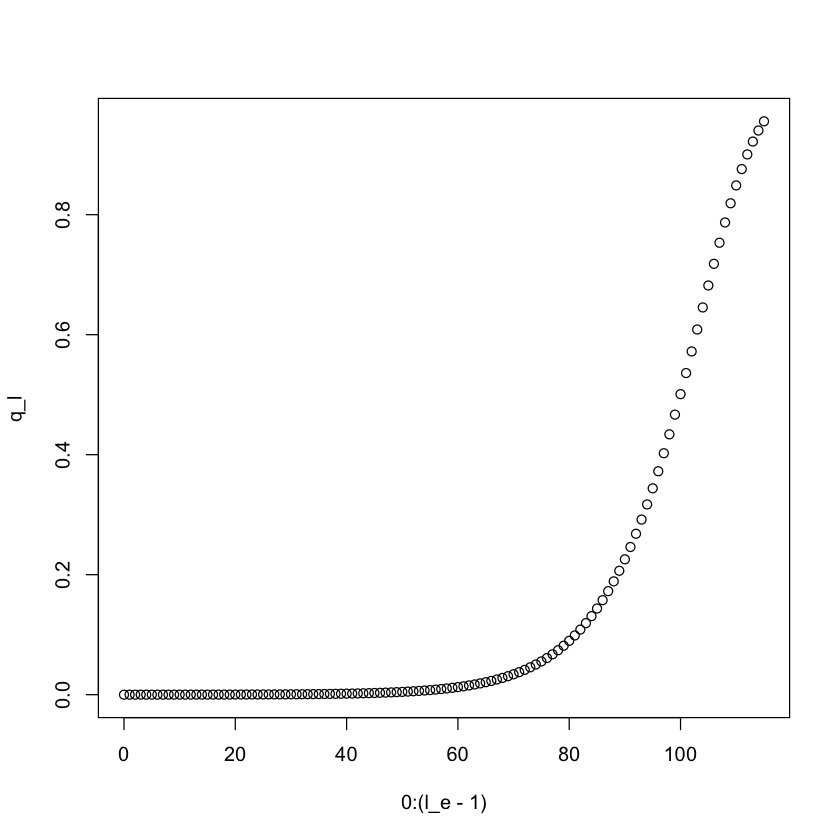

In [195]:
#calculate probability of dying at age l
 
calculate_q_l<-function(l,alpha,beta){
    q_l<-(calculate_F_l(l+1, alpha,beta)-calculate_F_l(l, alpha,beta))/(1-calculate_F_l(l, alpha,beta))
    return (q_l)
}

q_l<-sapply(0:(l_e-1),calculate_q_l,alpha=alpha,beta=beta)

plot(0:(l_e-1),q_l)

#plot(25:65,q_l[26:66])

## Ex. 6.31

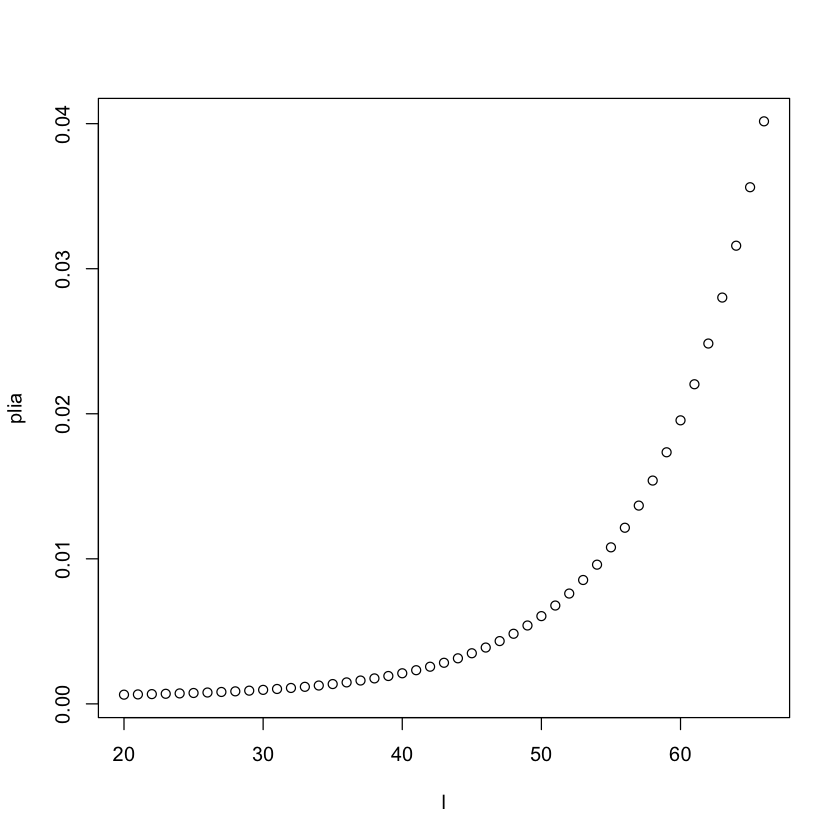

In [196]:
#inputs
psi0=0.0005
psi1=0.0000113
psi2=0.124

l=20:66

#calculate p_l_i_a

calculate_plia<-function(l,psi0,psi1,psi2){
    plia<-1-exp(-psi0-psi1*exp(psi2*l))
    return(plia)
}

plia<-calculate_plia(l,psi0,psi1,psi2)

#plot
plot(l,plia)

## Ex. 6.32

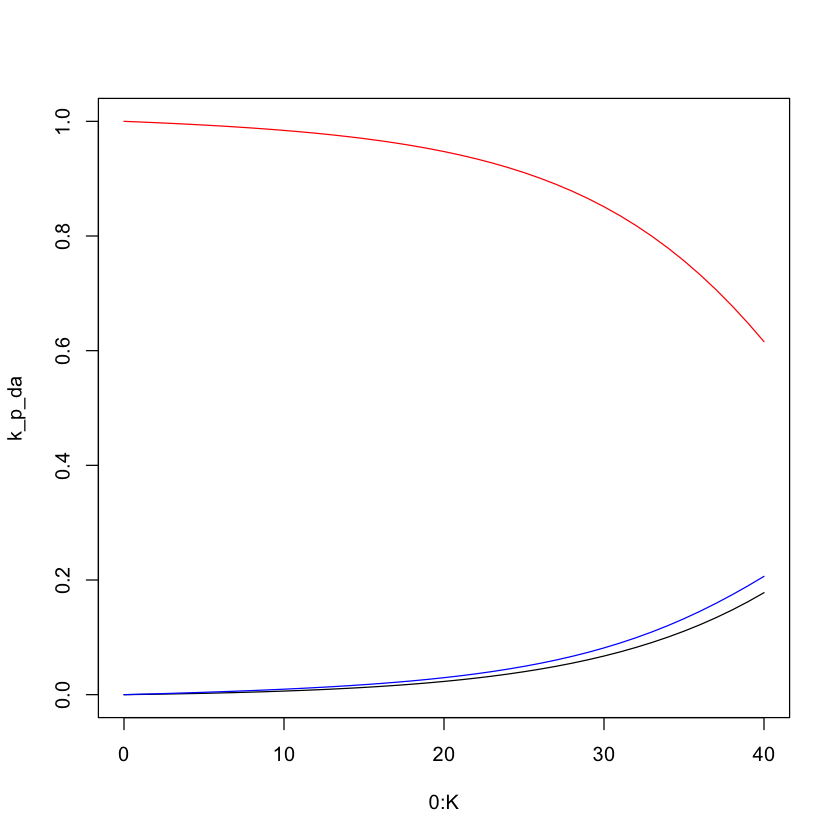

In [197]:
# inputs
K=40
l0=25

alpha=0.0003
beta=0.1

psi0=0.0005
psi1=0.0000113
psi2=0.124

#calculate k_p_da prob. of dying within next k periods

calculate_k_p_da<-function(k,l0,alpha,beta){
    k_p_da<-1-(exp(-alpha*exp(beta*(l0+k))-1))/(exp(-alpha*exp(beta*(l0))-1))
    return(k_p_da)
}

#calculate probability of geting disabled within next period (same function as earlier)

calculate_plia<-function(l,psi0,psi1,psi2){
    plia<-1-exp(-psi0-psi1*exp(psi2*l))
    return(plia)
}

#calculate probability of staying active in next k periods
calculate_k_p_aa<-function(k,l0,alpha,beta,psi0,psi1,psi2){
    k_p_da<-calculate_k_p_da(k,l0,alpha,beta)
    
    if (k==0){plia <- 0} else {
        plia<-calculate_plia(l0:(l0+k-1),psi0,psi1,psi2)
    }
    
    k_p_aa<-(1-k_p_da)*prod(1-plia)
    
    return(k_p_aa)
}


#calculate probabilities
k_p_da<-sapply(0:K,calculate_k_p_da,l0=l0,alpha=alpha,beta=beta)
k_p_aa<-sapply(0:K,calculate_k_p_aa,l0=l0,alpha=alpha,beta=beta,psi0=psi0,psi1=psi1,psi2=psi2)
k_p_ia<-1-k_p_da-k_p_aa

#plot
plot(0:K, k_p_da, "l",ylim=c(0,1))
lines(0:K,k_p_aa,col="red")
lines(0:K,k_p_ia,col="blue")

## Ex. 6.33

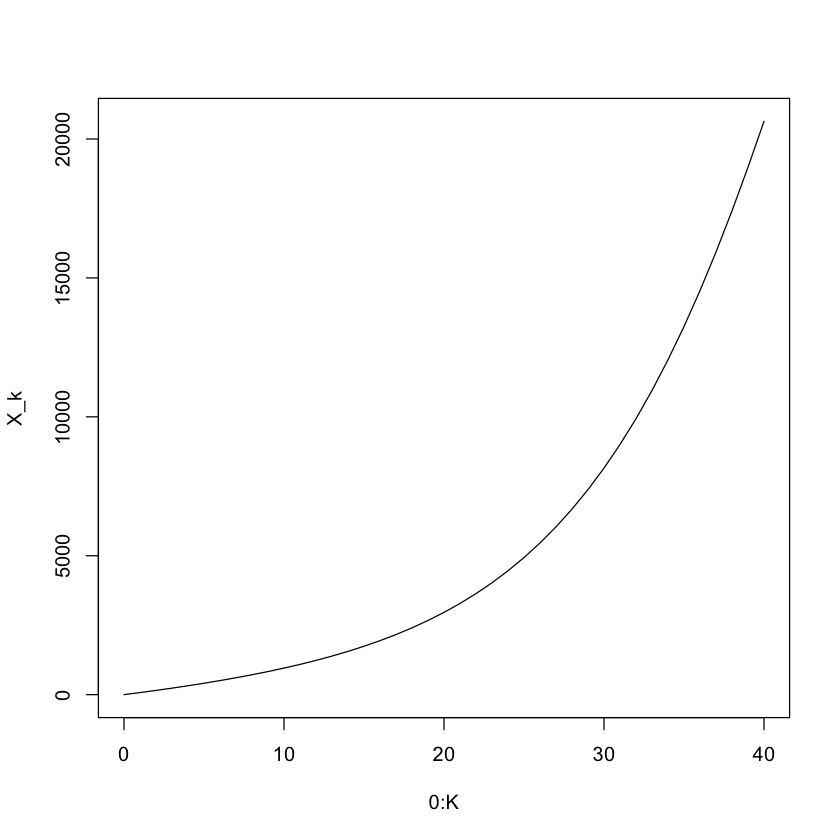

In [198]:
# inputs
N_l0=100000

K=40
l0=25

alpha=0.0003
beta=0.1

psi0=0.0005
psi1=0.0000113
psi2=0.124


s=1

# define function calculating the X_k

calculate_Xk<-function(k,l0,alpha,beta,psi0,psi1,psi2,N_l0,s){
    #
    #calculate probabilities
    k_p_da<-calculate_k_p_da(k=k,l0=l0,alpha=alpha,beta=beta)
    k_p_aa<-calculate_k_p_aa(k=k,l0=l0,alpha=alpha,beta=beta,psi0=psi0,psi1=psi1,psi2=psi2)
    k_p_ia<-1-k_p_da-k_p_aa
    
    X_k=k_p_ia*N_l0*s
    return(X_k)
}

#apply function

X_k<-sapply(0:K,calculate_Xk,l0=l0,alpha=alpha,beta=beta,psi0=psi0,psi1=psi1,psi2=psi2,N_l0=N_l0,s=s)

plot(0:K,X_k,"l")


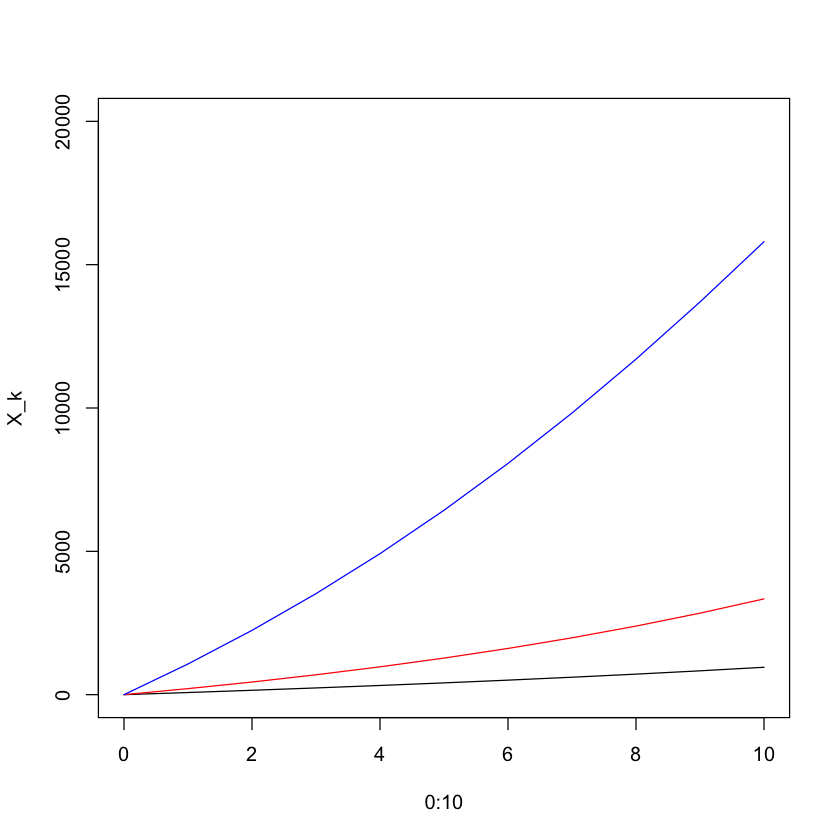

In [199]:
X_k<-sapply(0:10,calculate_Xk,l0=25,alpha=alpha,beta=beta,psi0=psi0,psi1=psi1,psi2=psi2,N_l0=N_l0,s=s)
plot(0:10,X_k,"l",ylim=c(0,20000))
X_k<-sapply(0:10,calculate_Xk,l0=40,alpha=alpha,beta=beta,psi0=psi0,psi1=psi1,psi2=psi2,N_l0=N_l0,s=s)
lines(0:10,X_k,col="red")
X_k<-sapply(0:10,calculate_Xk,l0=55,alpha=alpha,beta=beta,psi0=psi0,psi1=psi1,psi2=psi2,N_l0=N_l0,s=s)
lines(0:10,X_k,col="blue")

## Exercise 1

Let $X=(X_n)_{n=0,1,2...}$ be a Markov chain with state space $S=\{a,i,d\}$ (active, inactive,dead) for an individual with age 25. Assume first the same model as above, i.e. mortality described by $F(l)=1-e^{-\alpha(e^{\beta l}-1)}$ and $p_l(i|a)=1-e^{-\psi_0-\psi_1 e^{\psi_2 l}}$ with the same parameters as above. Assume that $p_l(a|i)=0$.

1. Write a function which calculates the transition matrix of Markov chain from age l to l+1 and run it for our parameters for ages l=25, 45, 65

In [200]:
# inputs
alpha=0.0003
beta=0.1

psi0=0.0005
psi1=0.0000113
psi2=0.124

p_l_ai=0

#define function
generate_transition_matrix<-function(l,alpha,beta,psi0,psi1,psi2,p_l_ai=0){
    q_l<-calculate_q_l(l,alpha,beta)
    p_l <- 1-q_l
    plia<-calculate_plia(l,psi0,psi1,psi2)

    transition_from_a<-c(p_l*(1-plia),p_l*plia,q_l) # a,i,d
    transition_from_i<-c(p_l*p_l_ai,p_l*(1-p_l_ai),q_l) #a,i,d
    transition_from_d<-c(0,0,1) #a,i,d

    return(rbind(transition_from_a,transition_from_i,transition_from_d))
}

#run it
generate_transition_matrix(l=25,alpha,beta,psi0,psi1,psi2)
generate_transition_matrix(l=45,alpha,beta,psi0,psi1,psi2)
generate_transition_matrix(l=65,alpha,beta,psi0,psi1,psi2)

[,1]      [,2]         [,3]        
transition_from_a 0.9988654 0.0007502666 0.0003842994
transition_from_i 0.0000000 0.9996157006 0.0003842994
transition_from_d 0.0000000 0.0000000000 1.0000000000

[,1]      [,2]        [,3]       
transition_from_a 0.9936846 0.003479312 0.002836126
transition_from_i 0.0000000 0.997163874 0.002836126
transition_from_d 0.0000000 0.000000000 1.000000000

[,1]      [,2]       [,3]      
transition_from_a 0.9443543 0.03487829 0.02076739
transition_from_i 0.0000000 0.97923261 0.02076739
transition_from_d 0.0000000 0.00000000 1.00000000

2. Compute a cumulative product of transition matrices from age $l_0=25$ to $l_r=65$ to calculate the transition probability from active to active/inactive/dead in each year. Compare with the calculations in Ex. 6.32

In [201]:
#inputs
l_0=25
l_r=65

transition_active_active <-vector(length=l_r-l_0+1)
transition_active_inactive <-vector(length=l_r-l_0+1)
transition_active_dead <-vector(length=l_r-l_0+1)
for (k in 0:(l_r-l_0)){
        if(k==0)  P=cbind(c(1,0,0),c(0,1,0),c(0,0,1)) else 
            P<-P%*% generate_transition_matrix(l=l_0+k-1,alpha,beta,psi0,psi1,psi2)
        transition_active_active[k+1]<-P[1,1]
        transition_active_inactive[k+1]<-P[1,2]
        transition_active_dead[k+1]<-P[1,3]
    }

In [202]:
print("Transition probability active active from matrix")
print(transition_active_active)
print("Transition probability active active from ex. 6.32")
print(k_p_aa)

[1] "Transition probability active active from matrix"
 [1] 1.0000000 0.9988654 0.9976588 0.9963717 0.9949950 0.9935182 0.9919298
 [8] 0.9902170 0.9883655 0.9863593 0.9841808 0.9818102 0.9792256 0.9764027
[15] 0.9733146 0.9699313 0.9662197 0.9621433 0.9576617 0.9527302 0.9473001
[22] 0.9413175 0.9347236 0.9274543 0.9194399 0.9106047 0.9008675 0.8901411
[29] 0.8783326 0.8653441 0.8510731 0.8354137 0.8182580 0.7994981 0.7790286
[36] 0.7567502 0.7325733 0.7064235 0.6782469 0.6480175 0.6157445
[1] "Transition probability active active from ex. 6.32"
 [1] 1.0000000 0.9988654 0.9976588 0.9963717 0.9949950 0.9935182 0.9919298
 [8] 0.9902170 0.9883655 0.9863593 0.9841808 0.9818102 0.9792256 0.9764027
[15] 0.9733146 0.9699313 0.9662197 0.9621433 0.9576617 0.9527302 0.9473001
[22] 0.9413175 0.9347236 0.9274543 0.9194399 0.9106047 0.9008675 0.8901411
[29] 0.8783326 0.8653441 0.8510731 0.8354137 0.8182580 0.7994981 0.7790286
[36] 0.7567502 0.7325733 0.7064235 0.6782469 0.6480175 0.6157445


In [203]:
print("Transition probability active inactive from matrix")
print(transition_active_inactive)
print("Transition probability active inactive from ex. 6.32")
print(k_p_ia)

[1] "Transition probability active inactive from matrix"
 [1] 0.0000000000 0.0007502666 0.0015323705 0.0023504445 0.0032091452
 [6] 0.0041137170 0.0050700636 0.0060848268 0.0071654740 0.0083203950
[11] 0.0095590081 0.0108918767 0.0123308359 0.0138891307 0.0155815642
[16] 0.0174246557 0.0194368094 0.0216384892 0.0240524000 0.0267036693
[21] 0.0296200271 0.0328319734 0.0363729282 0.0402793495 0.0445908038
[26] 0.0493499727 0.0546025666 0.0603971203 0.0667846302 0.0738179908
[31] 0.0815511787 0.0900381231 0.0993311960 0.1094792459 0.1205250976
[36] 0.1325024386 0.1454320210 0.1593171244 0.1741382584 0.1898471317
[41] 0.2063599929
[1] "Transition probability active inactive from ex. 6.32"
 [1] 0.0000000000 0.0007502666 0.0015323705 0.0023504445 0.0032091452
 [6] 0.0041137170 0.0050700636 0.0060848268 0.0071654740 0.0083203950
[11] 0.0095590081 0.0108918767 0.0123308359 0.0138891307 0.0155815642
[16] 0.0174246557 0.0194368094 0.0216384892 0.0240524000 0.0267036693
[21] 0.0296200271 0.032831

In [204]:
print("Transition probability active dead from matrix")
print(transition_active_dead)
print("Transition probability active dead from ex. 6.32")
print(k_p_da)

[1] "Transition probability active dead from matrix"
 [1] 0.0000000000 0.0003842994 0.0008088440 0.0012778287 0.0017958809
 [6] 0.0023681045 0.0030001278 0.0036981558 0.0044690275 0.0053202787
[11] 0.0062602101 0.0072979617 0.0084435940 0.0097081756 0.0111038783
[16] 0.0126440802 0.0143434761 0.0162181967 0.0182859357 0.0205660854
[21] 0.0230798804 0.0258505488 0.0289034709 0.0322663428 0.0359693456
[26] 0.0400453158 0.0445299150 0.0494617961 0.0548827592 0.0608378929
[31] 0.0673756932 0.0745481498 0.0824107899 0.0910226656 0.1004462682
[36] 0.1107473515 0.1219946420 0.1342594093 0.1476148709 0.1621353970
[41] 0.1778954825
[1] "Transition probability active dead from ex. 6.32"
 [1] 0.0000000000 0.0003842994 0.0008088440 0.0012778287 0.0017958809
 [6] 0.0023681045 0.0030001278 0.0036981558 0.0044690275 0.0053202787
[11] 0.0062602101 0.0072979617 0.0084435940 0.0097081756 0.0111038783
[16] 0.0126440802 0.0143434761 0.0162181967 0.0182859357 0.0205660854
[21] 0.0230798804 0.0258505488 0.0

3. Simulate the Markov chain for that individual until age 100. Number of simulation is n=10000. Assume that the individual is active at age 25. You can number the states (a=1,i=2,d=3).

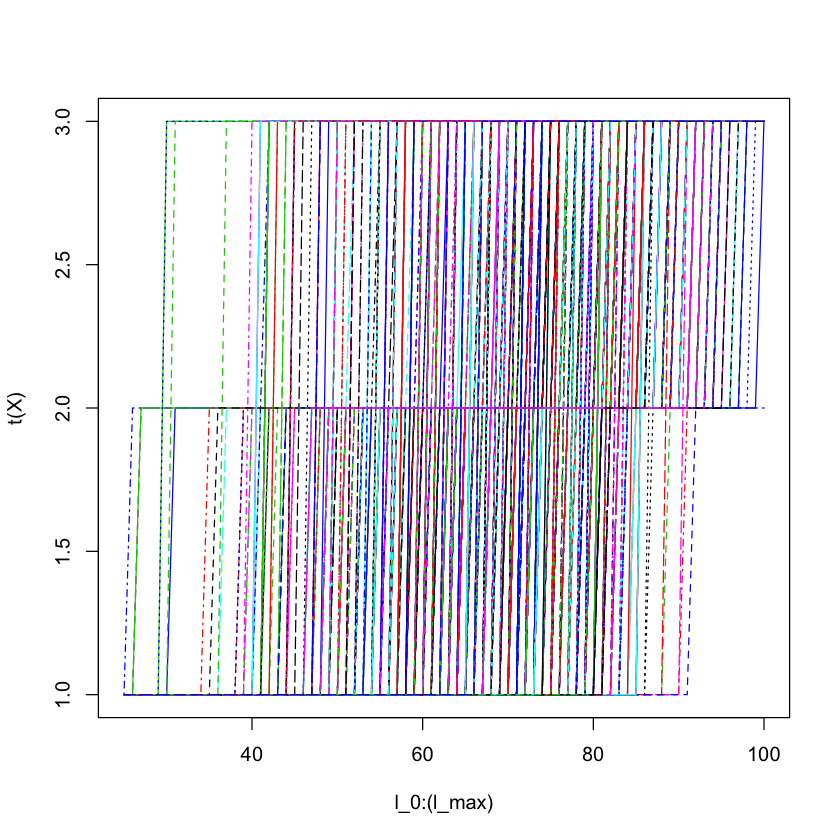

In [205]:
#inputs
l_0=25
l_max=100
n=1000
x_0=1

#define function
simulate_Markov<-function(l_0,l_max,x_0,n,alpha,beta,psi0,psi1,psi2,p_l_ai=0){
    X<-matrix(x_0,ncol=l_max-l_0+1,nrow=n)
    for (i in 1:n){
        for (j in 1:(l_max-l_0)){
            #generate the transition matrix
            P<-generate_transition_matrix(l=l_0+j-1,alpha,beta,psi0,psi1,psi2,p_l_ai)
            
            #choose row for the starting state
            P<-as.numeric(P[X[i,j],])
            
            #generate uniform random variable
            U<-runif(n=1)
            s=0
            p<-0
            
            while (p<U){
                s=s+1
                p=p+(P[s])
            }
            X[i,j+1] <- s
        }
    }
    return(X)
}

X<-simulate_Markov(l_0,l_max,x_0,n,alpha,beta,psi0,psi1,psi2)
matplot(l_0:(l_max),t(X),type="l")

4. An active insured has signed at age 25 a mortality pension, which pays s=1 yearly if the insured is disabled and under age 65. Approximate the mathematical reserve at time t=0 by computing MC-expected PV of the cashflows. Assume r=4% and that payouts are at the beginning of the period.

In [206]:
# inputs
r=0.04
l_r=65
l_0=25
s=1

#Define the policy function from being in a state
policy_function<-function(k,l_0,x,s,l_r){
    if((x==2)&(k+l_0<l_r)) {payout=s} 
       else {payout=0}
    return (payout)
}

#calculate the exp.PV (MC)
calculate_EPV_MC<-function(l_0,l_r,r,s,X,n){
    cashflows<-matrix(0,nrow=n,ncol=l_r-l_0+1)
    for (k in 0:(l_r-l0)){
        for (i in 1:n){
            cashflows[i,k+1]<-1/(1+r)^k*policy_function(k,l_0,X[i,k+1],s,l_r)
        }
    }
    PV<-apply(cashflows,1,sum)
    EPV<-mean(PV)
    return(EPV)
}

calculate_EPV_MC(l_0,l_r,r,s,X,n)

[1] 0.5769813

5. Calculate exact expected present value using the product of transition matrices.

In [207]:
# inputs
r=0.04
l_r=65
l_0=25
s=1


#calculate the exp.PV
calculate_EPV<-function(l_0,l_r,r,s,alpha,beta,psi0,psi1,psi2,p_l_ai=0){
    cashflows<-vector(length=l_r-l_0+1)
    for (k in 0:(l_r-l0)){
        if(k==0)  P=cbind(c(1,0,0),c(0,1,0),c(0,0,1)) else 
            P<-P%*% generate_transition_matrix(l=l_0+k-1,alpha,beta,psi0,psi1,psi2,p_l_ai)
        transition_probabilities_given_active_l_0<-P[1,]
        cashflows[k+1]<-1/(1+r)^k*
        sum(sapply(c(1,2,3), policy_function,k=k,l_0=l_0,s=s,l_r=l_r)*transition_probabilities_given_active_l_0)
    }
    EPV<-sum(cashflows)
    return(EPV)
}

calculate_EPV(l_0,l_r,r,s,alpha,beta,psi0,psi1,psi2)

[1] 0.6350763

## Exercise 2

Compute the simulated and exact mathematical reserve in Exercise 1 assuming now that $p_l(a|i)=0.05$. 

1. Define the transition matrix

In [208]:
# inputs
alpha=0.0003
beta=0.1

psi0=0.0005
psi1=0.0000113
psi2=0.124

p_l_ai=0.05


#run it
generate_transition_matrix(l=25,alpha,beta,psi0,psi1,psi2,p_ia)
generate_transition_matrix(l=45,alpha,beta,psi0,psi1,psi2,p_ia)
generate_transition_matrix(l=65,alpha,beta,psi0,psi1,psi2,p_ia)

[,1]       [,2]         [,3]        
transition_from_a 0.99886543 0.0007502666 0.0003842994
transition_from_i 0.04998079 0.9496349156 0.0003842994
transition_from_d 0.00000000 0.0000000000 1.0000000000

[,1]       [,2]        [,3]       
transition_from_a 0.99368456 0.003479312 0.002836126
transition_from_i 0.04985819 0.947305680 0.002836126
transition_from_d 0.00000000 0.000000000 1.000000000

[,1]       [,2]       [,3]      
transition_from_a 0.94435432 0.03487829 0.02076739
transition_from_i 0.04896163 0.93027098 0.02076739
transition_from_d 0.00000000 0.00000000 1.00000000

2. Simulate the Markov chain for that individual until age 100. Number of simulation is n=10000. Assume that the individual is active at age 25. You can number the states (a=1,i=2,d=3).

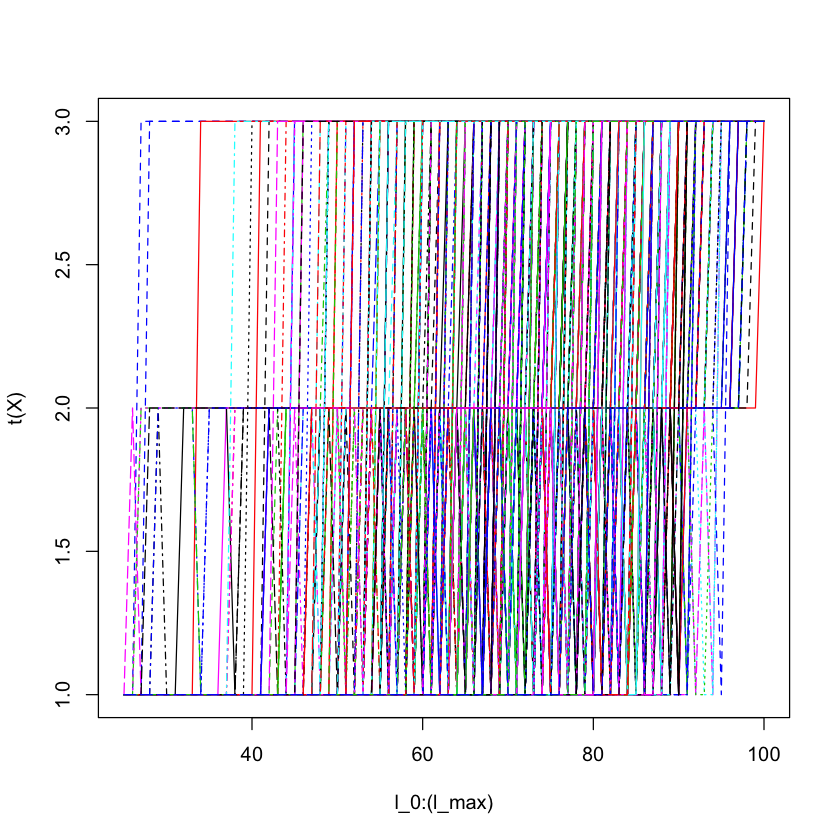

In [209]:
#inputs
l_0=25
l_max=100
n=1000
x_0=1

#define function

X<-simulate_Markov(l_0,l_max,x_0,n,alpha,beta,psi0,psi1,psi2,p_l_ai)
matplot(l_0:(l_max),t(X),type="l")

3. An active insured has signed at age 25 a mortality pension, which pays s=1 yearly if the insured is disabled and under age 65. Approximate the mathematical reserve at time t=0 by computing MC-expected PV of the cashflows. Assume r=4% and that payouts are at the beginning of the period.

In [210]:
# inputs
r=0.04
l_r=65
l_0=25
s=1


calculate_EPV_MC(l_0,l_r,r,s,X,n)

[1] 0.4396373

5. Calculate exact expected present value using the product of transition matrices.

In [211]:
# inputs
r=0.04
l_r=65
l_0=25
s=1



calculate_EPV(l_0,l_r,r,s,alpha,beta,psi0,psi1,psi2,p_l_ai)

[1] 0.4636988